# Name: Priyanka Dilip Shinde
# NUID: 001524484

# Abstract
Implemented a basic k means clustering algorithm, as a set of functions without using any machine learning packages or libraries like scikit-learn to implement this algorithm. 

Dataset: Mall Customer Segmentation Data

Contains basic data about your customers like Customer ID, age, gender, annual income and spending score.

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import matlib as mb

# Reading Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/priyankads/ADS-K-Means-Clustering-/main/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data=data.rename({'Genre':'Gender'},axis='columns')

In [5]:
data['Gender']=data.Gender.map({'Male':0,'Female':1})

In [6]:
df1 = data[["Annual Income (k$)","Spending Score (1-100)"]]

In [7]:
cluster_array = np.array(df1)

# Methodology for the K-Means algorithm:
1. Find the Euclidean Distance
*Euclidean Distance* is represented using the formula: 

    calc_distance = sqrt((xa-xb)^2 + (ya-yb)^2)
    
2. Assigning the clusters based on closest centroid i.e. (Minimum Euclidean distance) 

3. Calculate the mean of the formed clusters 

4. Calculate the new centroids based on these new means 

5. Calculate the variance  


In [8]:
# Calculate Euclidean distance between two observations
def euc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [9]:
# Assign cluster clusters based centroid proximity
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(euc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [10]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [11]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = mb.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

# Determining k using visualization

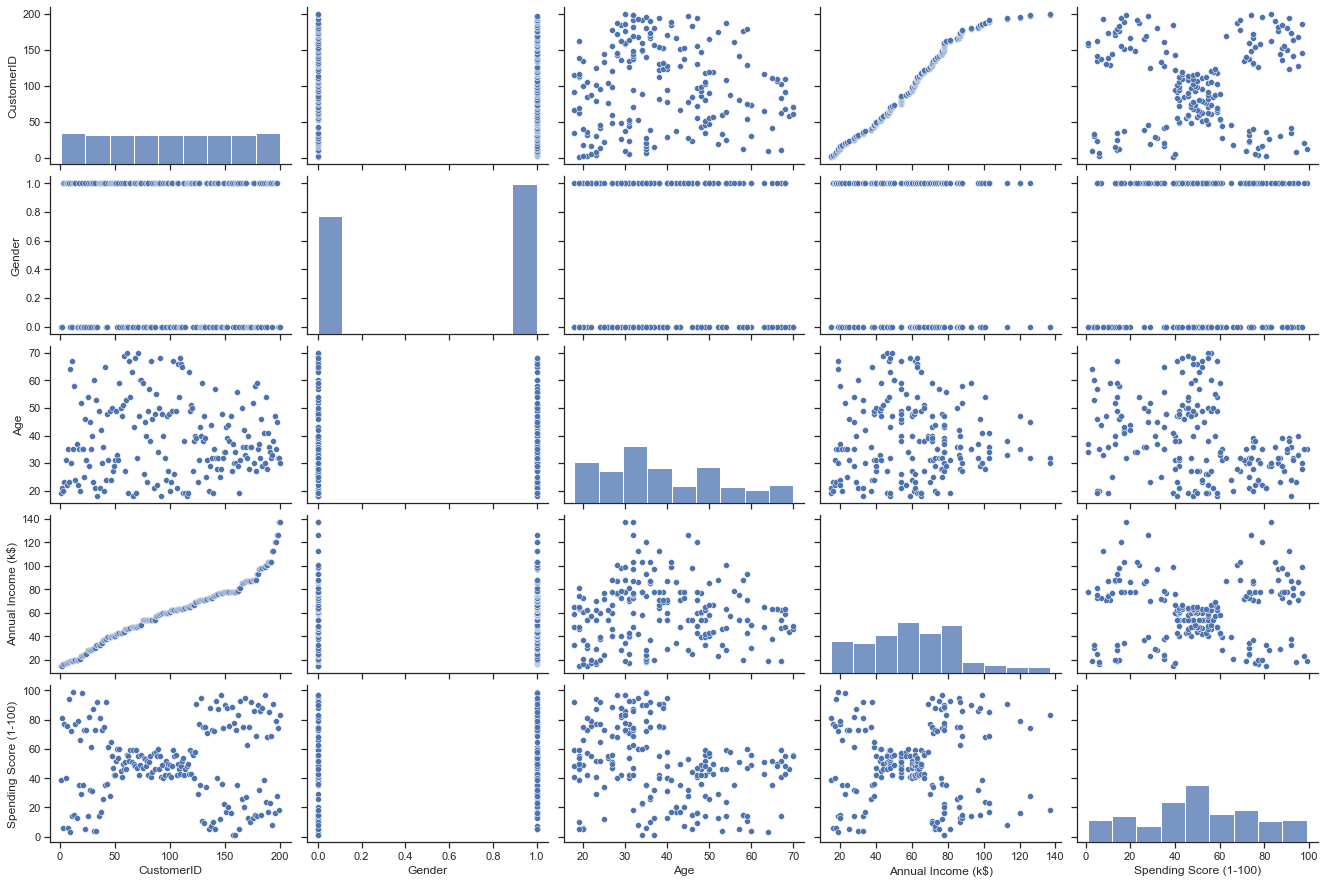

In [12]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, kind="scatter", aspect=1.5)
plt.show()

# Implementing k-Means for k = 5

In [13]:
#Based on the the above visualization, we can conclude there are approximately 5 clusters.
k = 5

cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 27097
1 9179
2 8918
3 8897
4 8890
5 8890
6 8890
7 8890
8 8890
9 8890
10 8890
11 8890
12 8890
13 8890
14 8890
15 8890
16 8890
17 8890
18 8890
19 8890
20 8890


# Plotting Visualization for k = 5

Text(0, 0.5, 'Spending Score (1-100)')

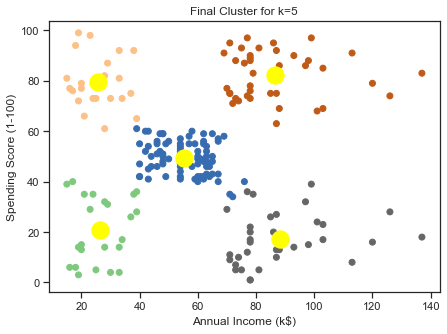

In [14]:
plt.subplots(figsize=(7,5))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap= 'Accent');
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1],s=300,c='yellow')
plt.title('Final Cluster for k=5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Implementing k-Means and plotting visualization for k = 2,3,4

In [15]:
k = 2
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 92730
1 92097
2 92066
3 92066
4 92066
5 92066
6 92066
7 92066
8 92066
9 92066
10 92066
11 92066
12 92066
13 92066
14 92066
15 92066
16 92066
17 92066
18 92066
19 92066
20 92066


Text(0, 0.5, 'Spending Score (1-100)')

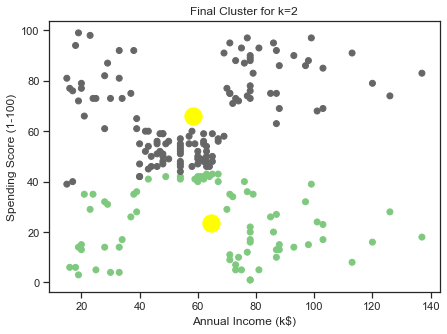

In [16]:
plt.subplots(figsize=(7,5))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap= 'Accent');
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1],s=300,c='yellow')
plt.title('Final Cluster for k=2')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [17]:
k = 3
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 50496
1 46236
2 40503
3 35907
4 35449
5 35449
6 35449
7 35449
8 35449
9 35449
10 35449
11 35449
12 35449
13 35449
14 35449
15 35449
16 35449
17 35449
18 35449
19 35449
20 35449


Text(0, 0.5, 'Spending Score (1-100)')

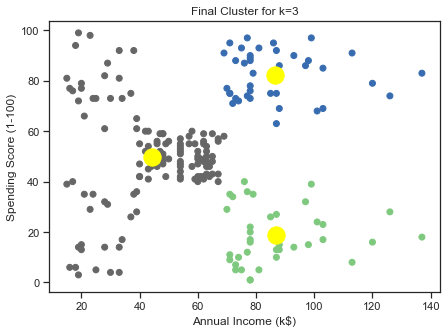

In [18]:
plt.subplots(figsize=(7,5))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap= 'Accent');
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1],s=300,c='yellow')
plt.title('Final Cluster for k=3')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [19]:
k = 4
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 35364
1 22272
2 20497
3 18470
4 18470
5 18470
6 18470
7 18470
8 18470
9 18470
10 18470
11 18470
12 18470
13 18470
14 18470
15 18470
16 18470
17 18470
18 18470
19 18470
20 18470


Text(0, 0.5, 'Spending Score (1-100)')

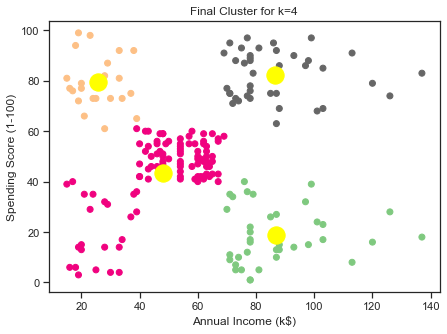

In [20]:
plt.subplots(figsize=(7,5))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap= 'Accent');
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1],s=300,c='yellow')
plt.title('Final Cluster for k=4')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Conclusion

K-Means clustering algorithm was implemented in this notebook using python.